In [149]:
# require or install packages
getPacks <- function( packs ) {
  
  # Check wich packages are not intalled and install them
  if ( sum(!packs %in% installed.packages()[, 'Package'])) {
    install.packages( packs[ which(!packs %in% installed.packages()[, 'Package']) ], 
                      dependencies = T)
  }
  
  # Require all packages
  sapply(packs, require, character.only =  T)
  
}

In [158]:
getPacks(c('dplyr', 'ggplot2', 'lme4', 'lmerTest', 'car', 'lattice', 'sjPlot'))

Loading required package: car
Loading required package: carData

Attaching package: ‘car’

The following object is masked from ‘package:dplyr’:

    recode



dplyr  ggplot2     lme4 lmerTest      car  lattice   sjPlot 
    TRUE     TRUE     TRUE     TRUE     TRUE     TRUE     TRUE

In [10]:
paths <- dir(path = '~/summary', pattern='*.txt', full.names=T)
names(paths) <- basename(paths)
paths

sub_1_epo.txt 
"/Users/josealanis/summary/sub_1_epo.txt" 
                            sub_2_epo.txt 
"/Users/josealanis/summary/sub_2_epo.txt" 
                            sub_3_epo.txt 
"/Users/josealanis/summary/sub_3_epo.txt" 
                            sub_4_epo.txt 
"/Users/josealanis/summary/sub_4_epo.txt" 
                            sub_5_epo.txt 
"/Users/josealanis/summary/sub_5_epo.txt" 
                            sub_6_epo.txt 
"/Users/josealanis/summary/sub_6_epo.txt" 
                            sub_7_epo.txt 
"/Users/josealanis/summary/sub_7_epo.txt"

In [165]:
epo_data <- lapply(paths, read.table, header=T, sep=',')

In [166]:
epo_data <- dplyr::bind_rows(epo_data, .id = 'sub')
head(epo_data)

sub,condition,epoch,time,Fc5,Fc3,Fc1,Fcz,Fc2,Fc4,⋯,P8,Po7,Po3,Poz,Po4,Po8,O1,Oz,O2,Iz
sub_1_epo.txt,feet,0,-500,-37.73,-64.20,-60.68,-52.95,-53.77,-29.58,⋯,57.54,51.01,40.28,25.53,35.06,42.14,32.62,23.76,22.51,24.99
sub_1_epo.txt,feet,0,-490,-19.96,-36.52,-36.10,-44.35,-43.15,-20.77,⋯,38.39,35.13,23.36,2.16,17.80,24.76,11.10,-0.26,12.96,-10.51
sub_1_epo.txt,feet,0,-480,13.14,-5.53,-14.90,-36.50,-35.11,-16.28,⋯,19.99,25.18,12.79,-13.27,-0.11,2.38,-2.34,-20.47,-11.65,-19.95
sub_1_epo.txt,feet,0,-470,22.97,-1.62,-20.14,-44.11,-37.91,-17.23,⋯,20.88,38.22,23.87,0.72,10.22,14.83,11.24,-7.84,-12.97,16.73
sub_1_epo.txt,feet,0,-460,21.17,-4.01,-25.96,-51.58,-45.13,-21.08,⋯,33.15,39.02,26.33,15.14,29.72,34.99,41.39,33.40,22.89,48.12
sub_1_epo.txt,feet,0,-450,8.87,-14.03,-29.97,-51.51,-46.20,-19.92,⋯,45.28,25.62,17.78,13.56,34.09,36.36,36.09,36.01,29.06,22.06


In [167]:
epo_data_fcz <- epo_data %>% dplyr::select(sub, condition, epoch, time, Fcz)
head(epo_data_fcz)

sub,condition,epoch,time,Fcz
sub_1_epo.txt,feet,0,-500,-52.95
sub_1_epo.txt,feet,0,-490,-44.35
sub_1_epo.txt,feet,0,-480,-36.50
sub_1_epo.txt,feet,0,-470,-44.11
sub_1_epo.txt,feet,0,-460,-51.58
sub_1_epo.txt,feet,0,-450,-51.51


In [168]:
epo_data_fcz$epoch <- epo_data_fcz$epoch+1
head(epo_data_fcz)

sub,condition,epoch,time,Fcz
sub_1_epo.txt,feet,1,-500,-52.95
sub_1_epo.txt,feet,1,-490,-44.35
sub_1_epo.txt,feet,1,-480,-36.50
sub_1_epo.txt,feet,1,-470,-44.11
sub_1_epo.txt,feet,1,-460,-51.58
sub_1_epo.txt,feet,1,-450,-51.51


In [169]:
epo_data_fcz <- epo_data_fcz %>% mutate(run = ifelse(epoch <= 15, 1, ifelse(epoch <= 30, 2, 3)))
head(epo_data_fcz)
tail(epo_data_fcz)

sub,condition,epoch,time,Fcz,run
sub_1_epo.txt,feet,1,-500,-52.95,1
sub_1_epo.txt,feet,1,-490,-44.35,1
sub_1_epo.txt,feet,1,-480,-36.50,1
sub_1_epo.txt,feet,1,-470,-44.11,1
sub_1_epo.txt,feet,1,-460,-51.58,1
sub_1_epo.txt,feet,1,-450,-51.51,1


,sub,condition,epoch,time,Fcz,run
63310,sub_7_epo.txt,feet,45,1450,-8.76,3
63311,sub_7_epo.txt,feet,45,1460,-17.67,3
63312,sub_7_epo.txt,feet,45,1470,-17.43,3
63313,sub_7_epo.txt,feet,45,1480,-14.67,3
63314,sub_7_epo.txt,feet,45,1490,-12.40,3
63315,sub_7_epo.txt,feet,45,1500,-6.01,3


In [170]:
epo_data_fcz <- epo_data_fcz %>% filter(time >= 400 & time <= 500)
head(epo_data_fcz)

sub,condition,epoch,time,Fcz,run
sub_1_epo.txt,feet,1,400,-10.15,1
sub_1_epo.txt,feet,1,410,4.76,1
sub_1_epo.txt,feet,1,420,10.08,1
sub_1_epo.txt,feet,1,430,5.23,1
sub_1_epo.txt,feet,1,440,2.24,1
sub_1_epo.txt,feet,1,450,7.03,1


In [177]:
mod_1 <- lmer(data = epo_data_fcz, Fcz ~ condition + (1+condition|sub))

In [178]:
anova(mod_1)

,Sum Sq,Mean Sq,NumDF,DenDF,F value,Pr(>F)
condition,1698.945,1698.945,1,5.997552,5.328705,0.06041871


In [179]:
summary(mod_1)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: Fcz ~ condition + (1 + condition | sub)
   Data: epo_data_fcz

REML criterion at convergence: 29832.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.7683 -0.5367 -0.0118  0.4967  4.3940 

Random effects:
 Groups   Name           Variance Std.Dev. Corr 
 sub      (Intercept)     26.77    5.174        
          conditionhands  15.32    3.914   -0.85
 Residual                318.83   17.856        
Number of obs: 3465, groups:  sub, 7

Fixed effects:
               Estimate Std. Error     df t value Pr(>|t|)  
(Intercept)      -3.351      2.002  6.018  -1.674   0.1449  
conditionhands    3.691      1.599  5.998   2.308   0.0604 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
conditnhnds -0.826

[1] 1133 1129

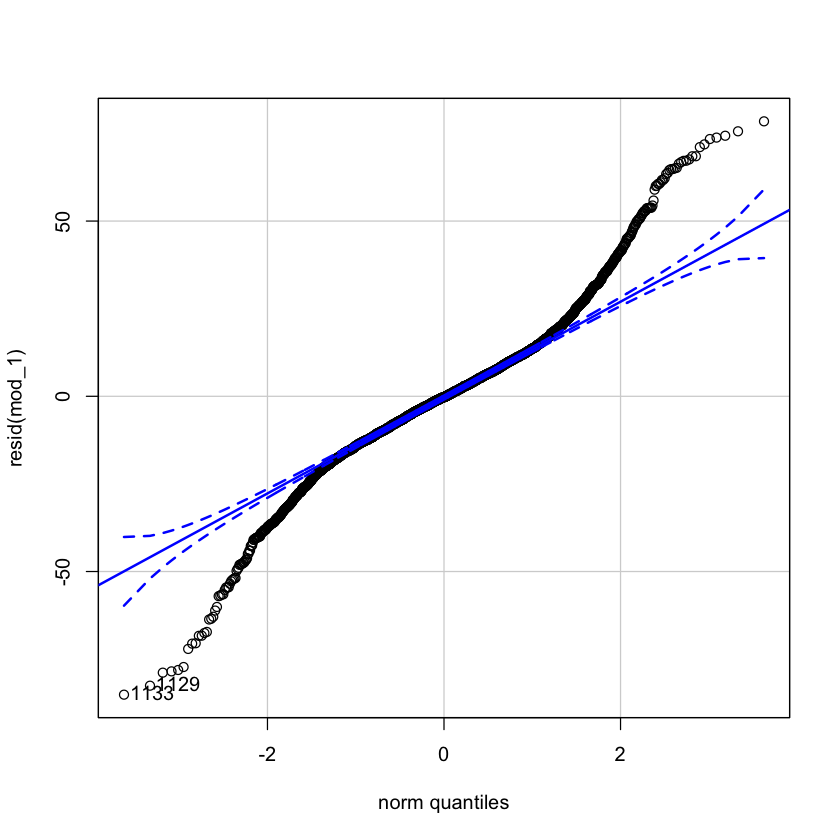

In [180]:
qqPlot(resid(mod_1))

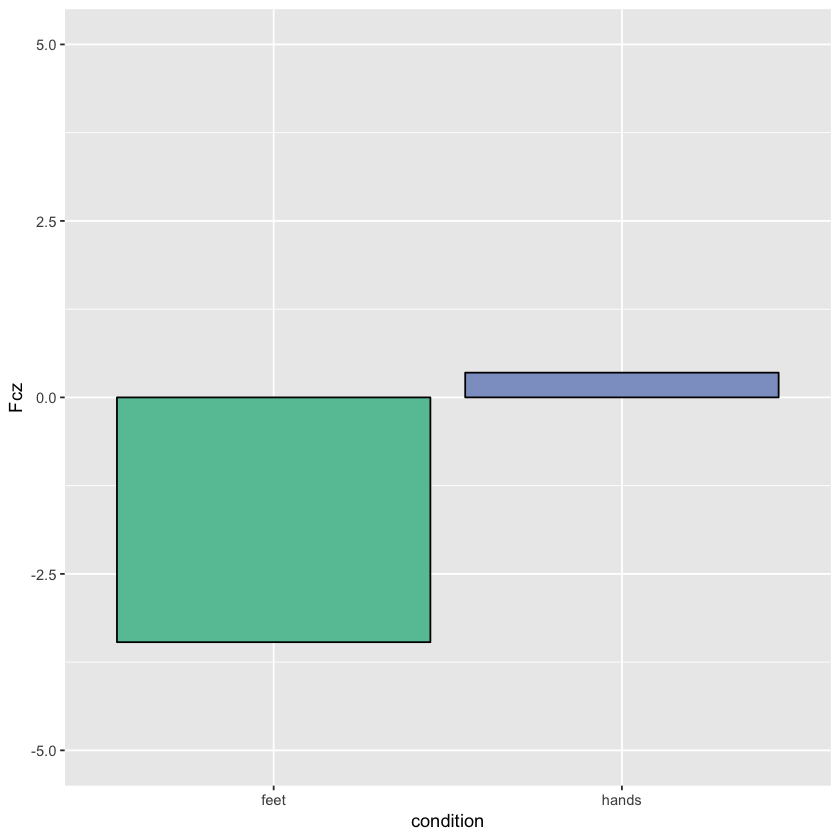

In [131]:
base_plot <- ggplot(epo_data_fcz, aes(x = condition, y = Fcz)) +
    stat_summary(aes(fill = factor(condition)), fun.y = mean, geom = "bar", color = "black") + 
    scale_fill_manual(values = c("#66c2a5", "#8da0cb")) +
    theme(legend.position = "none") + 
    coord_cartesian(ylim = c(-5, 5))
base_plot

$sub


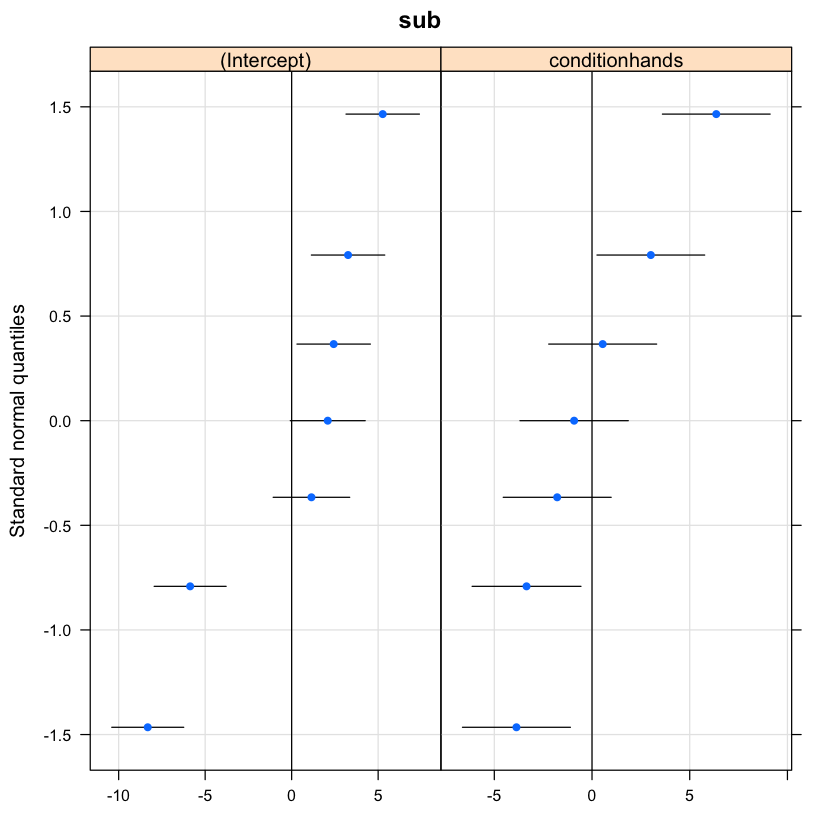

In [182]:
qqmath(ranef(mod_1, condVar=TRUE)) 